In [259]:
from IPython.core.display import HTML
HTML("""
        <center><h1>Titanic Kaggle</h1></center>
    """)

In [260]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sbn
%matplotlib inline


In [261]:
train = pd.read_csv('D:\\titanic_testdata\\train.csv')
train.head()

train.shape
test = pd.read_csv('D:\\titanic_testdata\\test.csv')

test.shape
#shape of both data sets
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [262]:
#merge both the data sets
data=train.append(test)
data.shape

data.head()

#store the passenger id of the test data set
passenger_id = test['PassengerId']
passenger_id.head(10)

c:\users\kk\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64

In [263]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [264]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [266]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [267]:
HTML("""
        <center><h3>Cleaning the Data</h3></center>
    """)

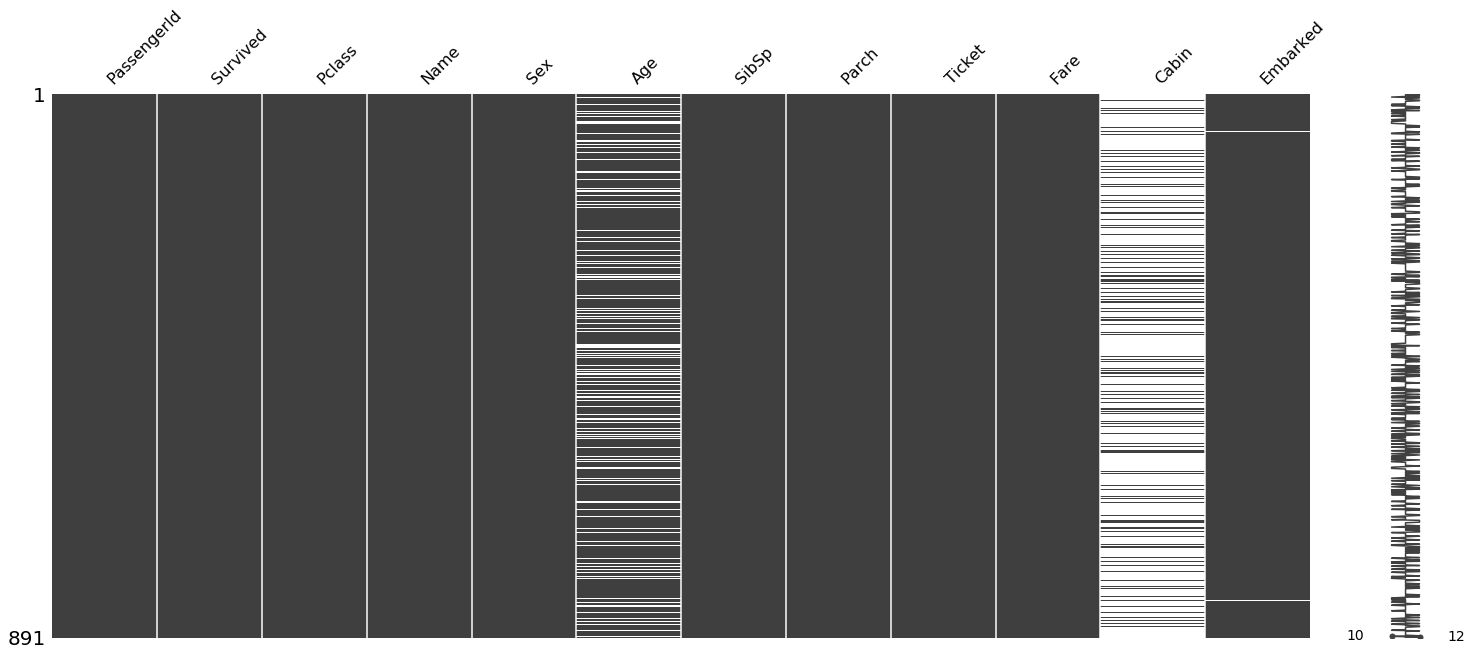

In [268]:
import missingno as mn
mn.matrix(train)

In [269]:
#imputer class from scikit to fill the missing values
from sklearn.preprocessing import Imputer
#filling up those missing values with the median of all the values in a particular column,axis=1 column wise
imp = Imputer(missing_values='NaN', strategy='median', axis=1)
age_missing = imp.fit_transform(train['Age'].values.reshape(1,-1))
#T == transpose
age_missing = age_missing.T
#creating a new column in the train set 
train['Age_new'] = age_missing
train.head()

#similarly for test data set
age_test = imp.fit_transform(test['Age'].values.reshape(1,-1))
age_test = age_test.T
test['Age_new'] = age_test
test.head()

c:\users\kk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [270]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_new          0
dtype: int64

In [271]:
train.Embarked.value_counts()
#using fillna for embarked values
train.Embarked.fillna('S', inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_new          0
dtype: int64

In [272]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_new          0
dtype: int64

In [273]:
#filling fare
test.Fare.fillna(test.Fare.mean(), inplace=True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Age_new          0
dtype: int64

In [274]:
#cabin - approximately 80 % of values are missing, so we drop the cabin attribute.
#age - column which contains NaN is also dropped.

train.drop(['Age','Cabin'], axis = 1, inplace = True)
test.drop(['Age','Cabin'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [275]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


In [276]:
#now there are no missing values in the train and test data sets

In [277]:
train['Sex'].dtype

dtype('O')

In [278]:
#changing the sex from object to int64
train['Sex'] = train.Sex.apply(lambda x:0 if x == 'female' else 1)
test['Sex'] = test.Sex.apply(lambda x:0 if x == 'female' else 1)
test.Sex.head()
train.Sex.head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [279]:
HTML("""
        <h5>Detecting Outliers</h5>
    """)

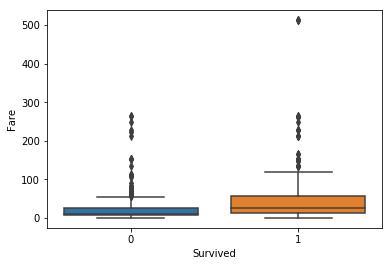

In [280]:
sbn.boxplot(x='Survived', y='Fare', data=train)


In [281]:
train['Fare'] = train[train['Fare'] <=400]
#test['Fare'] = test[test['Fare'] <=400]
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q,62.0
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S,22.0


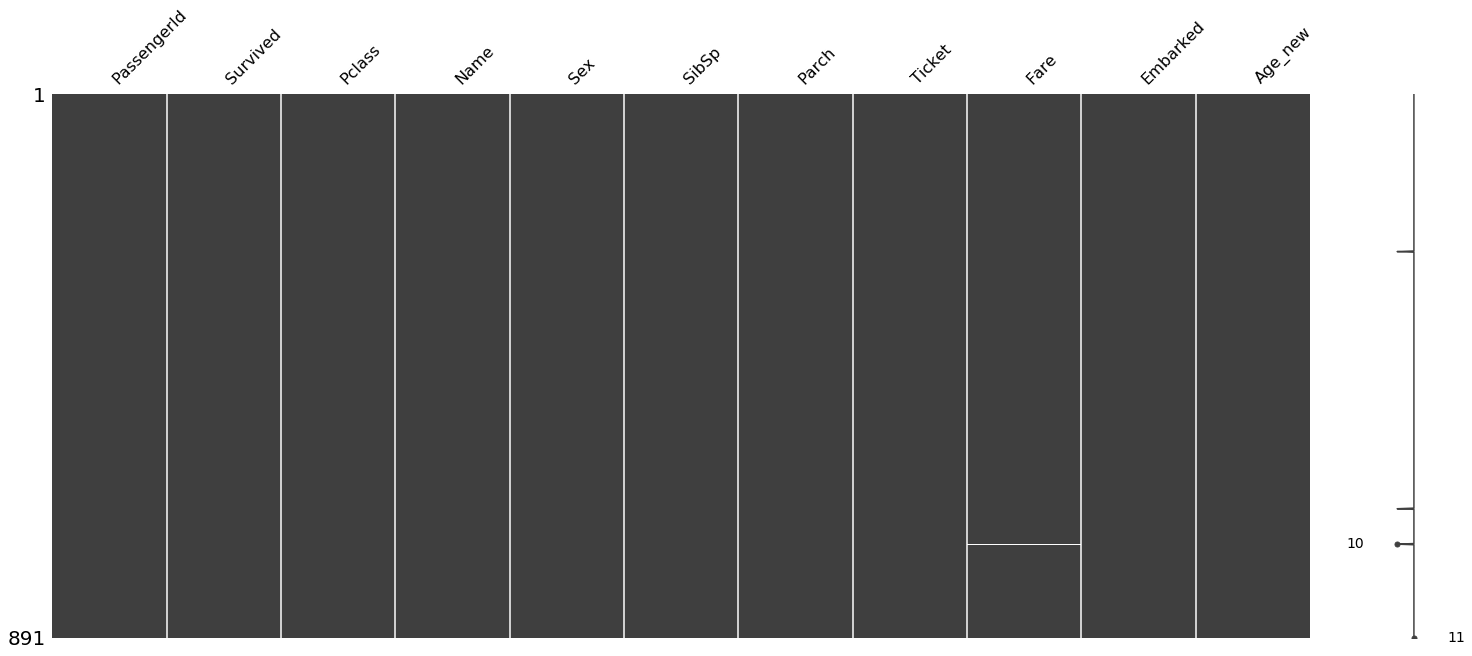

In [282]:
mn.matrix(train)

In [283]:
HTML("""
        <center><h3>Checking Correlation</h3></center>
    """)

In [284]:
train.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Age_new
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,29.361582
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,13.019697
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,22.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,28.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,35.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,80.000000


In [285]:
#groupby survived
train.groupby('Survived').mean()

,PassengerId,Pclass,Sex,SibSp,Parch,Age_new
Survived,,,,,,
0,447.016393,2.531876,0.852459,0.553734,0.329690,30.028233
1,444.368421,1.950292,0.318713,0.473684,0.464912,28.291433


In [286]:
#groupby sex
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Age_new
Sex,,,,,,
0,431.028662,0.742038,2.159236,0.694268,0.649682,27.929936
1,454.147314,0.188908,2.389948,0.429809,0.235702,30.140676


In [287]:
#implies survived female = 74% , male = 18% 

In [288]:
HTML("""
        <h5>Correlation Matrix</h5>
    """)

In [289]:
train.corr()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Age_new
PassengerId,1.000000,-0.005007,-0.035144,0.042939,-0.057527,-0.001652,0.034212
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.035322,0.081629,-0.064910
Pclass,-0.035144,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.339898
Sex,0.042939,-0.543351,0.131900,1.000000,-0.114631,-0.245489,0.081163
SibSp,-0.057527,-0.035322,0.083081,-0.114631,1.000000,0.414838,-0.233296
Parch,-0.001652,0.081629,0.018443,-0.245489,0.414838,1.000000,-0.172482
Age_new,0.034212,-0.064910,-0.339898,0.081163,-0.233296,-0.172482,1.000000


In [290]:
HTML("""
        <h4>HeatMap</h4>
    """)

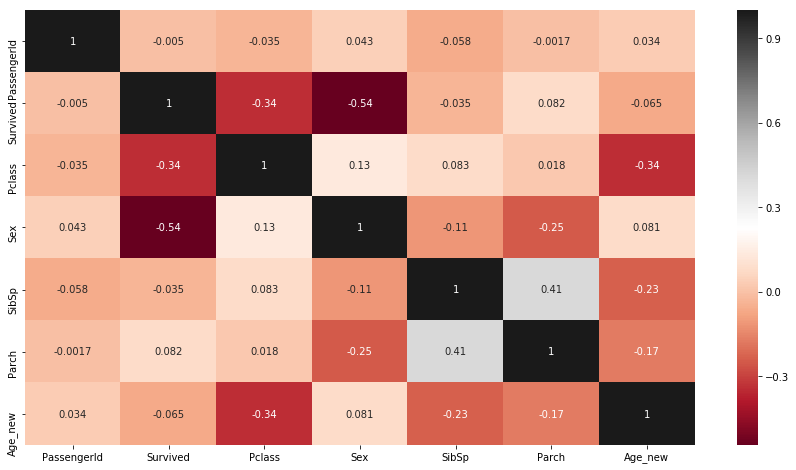

In [291]:
plt.subplots(figsize=(15,8))

sbn.heatmap(train.corr(), annot = True, cmap = 'RdGy')

In [292]:
HTML("""
    <h4>Variable relation and Visualization</h4>
""")

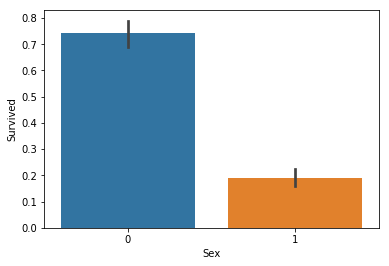

In [293]:
# sex vs survived
sbn.barplot(x='Sex', y='Survived', data=train)

In [294]:
#female survival rate is more when compared to male .

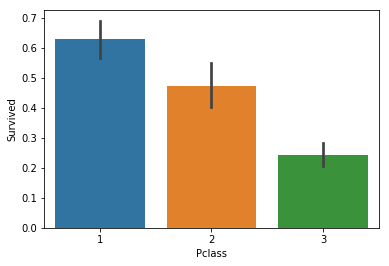

In [295]:
#Pclass and Survived
sbn.barplot(x="Pclass", y="Survived", data=train)

In [296]:
# survival rate from above plot
# class1 > class2 > class3

In [297]:
HTML(
    """
        <h4>Density Plot</h4>
    """)

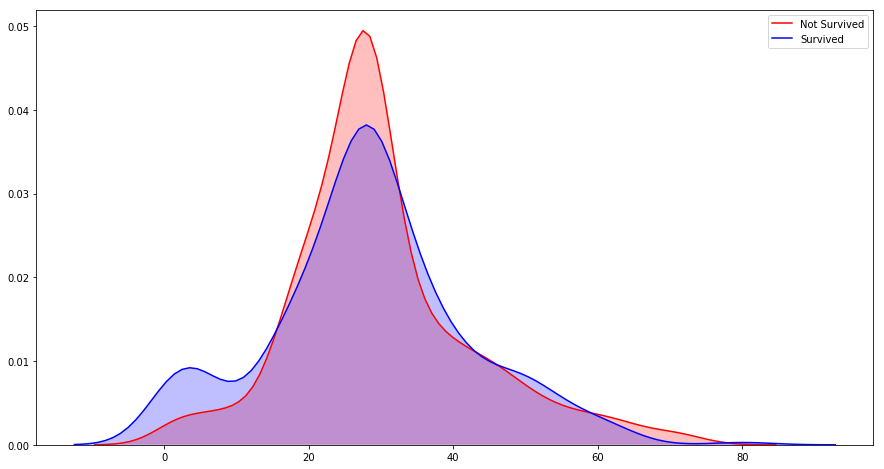

In [298]:
#Age and Survived
plt.subplots(figsize=(15,8))

sbn.kdeplot(train.loc[(train['Survived']==0),'Age_new'], color='r', shade=True, Label="Not Survived")
sbn.kdeplot(train.loc[(train['Survived']==1),'Age_new'], color='b', shade=True, Label="Survived")

In [299]:
HTML("""
    <center><h2>Feature Engineering</h2></center>
"""
)

In [300]:
#Since there is a SibSp and Parch, we can create a family_size attribute
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1
train.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [301]:
#creating familyGroups with the known family_size attribute
def familyGroup(size):
    a=''
    if(size==1):
        a='alone'
    elif(size<=4):
        a='small'
    elif(size>4):
        a='large'
    return a

train['family_group'] = train.family_size.map(familyGroup)
test['family_group'] = test.family_size.map(familyGroup)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new,family_size,family_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1,S,22.0,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,2,C,38.0,2,small
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,3,S,26.0,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,4,S,35.0,2,small
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,5,S,35.0,1,alone


In [302]:
#categorising the age
train['Age_new'].astype('int64')
test['Age_new'].astype('int64')

0      34
1      47
2      62
3      27
4      22
5      14
6      30
7      26
8      18
9      21
10     27
11     46
12     23
13     63
14     47
15     24
16     35
17     21
18     27
19     45
20     55
21      9
22     27
23     21
24     48
25     50
26     22
27     22
28     41
29     27
       ..
388    21
389     6
390    23
391    51
392    13
393    47
394    29
395    18
396    24
397    48
398    22
399    31
400    30
401    38
402    22
403    17
404    43
405    20
406    23
407    50
408    27
409     3
410    27
411    37
412    28
413    27
414    39
415    38
416    27
417    27
Name: Age_new, Length: 418, dtype: int64

In [303]:
def ageGroup(age):
    a=''
    if(age<=1):
        a='infant'
    elif(age<=4):
        a='baby'
    elif(age<=12):
        a='child'
    elif(age<=19):
        a='teenager'
    elif(age<=28):
        a='young adult'
    elif(age<=40):
        a='adult'
    elif(age<=58):
        a='middle_age'
    else:
        a='old'
    return a

train['age_group'] = train['Age_new'].map(ageGroup)
test['age_group'] = test['Age_new'].map(ageGroup)
train['age_group'].value_counts()

young adult    375
adult          202
middle_age     122
teenager        95
child           29
old             28
baby            26
infant          14
Name: age_group, dtype: int64

In [304]:
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new,family_size,family_group,age_group
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q,34.5,1,alone,adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S,47.0,2,small,middle_age
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q,62.0,1,alone,old
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S,27.0,1,alone,young adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S,22.0,3,small,young adult


In [305]:
#categorising the fare
train['fare_per_person'] = train['Fare'] / train['family_size']
test['fare_per_person'] = test['Fare'] / test['family_size']
train.head()
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new,family_size,family_group,age_group,fare_per_person
0,892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q,34.5,1,alone,adult,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S,47.0,2,small,middle_age,3.500000
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q,62.0,1,alone,old,9.687500
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S,27.0,1,alone,young adult,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S,22.0,3,small,young adult,4.095833


In [306]:
#categorising fare into groups
def fareGroup(fare):
    a=''
    if(fare<=4):
        a='VeryLow'
    elif(fare<=10):
        a='Low'
    elif(fare<=20):
        a='Medium'
    elif(fare<=40):
        a='High'
    else:
        a='VeryHigh'
        
    return a

train['fare_group'] = train.fare_per_person.map(fareGroup)
test['fare_group'] = test.fare_per_person.map(fareGroup)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_new,family_size,family_group,age_group,fare_per_person,fare_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1,S,22.0,2,small,young adult,0.5,VeryLow
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,2,C,38.0,2,small,adult,1,VeryLow
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,3,S,26.0,1,alone,young adult,3,VeryLow
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,4,S,35.0,2,small,adult,2,VeryLow
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,5,S,35.0,1,alone,adult,5,Low


In [307]:
HTML(
    """
        <h3>Creating Dummy Variables</h3>
    """
)

In [308]:
#creating dummies for Embarked,family_group,fare_group,age_group
train = pd.get_dummies(train, columns = ['Embarked', 'family_group', 'age_group', 'fare_group'], drop_first = True)
test = pd.get_dummies(test, columns = ['Embarked', 'family_group', 'age_group', 'fare_group'], drop_first = True)

In [309]:
train.shape , test.shape

((891, 27), (418, 26))

In [310]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age_new,...,age_group_child,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_young adult,fare_group_Low,fare_group_Medium,fare_group_VeryHigh,fare_group_VeryLow
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1,22.0,...,0,0,0,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,2,38.0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,3,26.0,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,4,35.0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,5,35.0,...,0,0,0,0,0,0,1,0,0,0


In [311]:
#dropping unnecessary columns like: Name, Ticket, Fare, Age_new, fare_per_person, family_size
train.drop(['Name', 'Ticket', 'Fare', 'Age_new', 'fare_per_person', 'family_size'], axis = 1, inplace=True)
test.drop(['Name', 'Ticket', 'Fare', 'Age_new', 'fare_per_person', 'family_size'], axis = 1, inplace=True)

In [312]:
train.head()
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked_Q,Embarked_S,family_group_large,family_group_small,age_group_baby,age_group_child,age_group_infant,age_group_middle_age,age_group_old,age_group_teenager,age_group_young adult,fare_group_Low,fare_group_Medium,fare_group_VeryHigh,fare_group_VeryLow
0,892,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,893,3,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,894,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,895,3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
4,896,3,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0


In [313]:
HTML(
    """
       <center><h1> DATA MODELLING </h1></center>
    """
)

In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
PassengerId              891 non-null int64
Survived                 891 non-null int64
Pclass                   891 non-null int64
Sex                      891 non-null int64
SibSp                    891 non-null int64
Parch                    891 non-null int64
Embarked_Q               891 non-null uint8
Embarked_S               891 non-null uint8
family_group_large       891 non-null uint8
family_group_small       891 non-null uint8
age_group_baby           891 non-null uint8
age_group_child          891 non-null uint8
age_group_infant         891 non-null uint8
age_group_middle_age     891 non-null uint8
age_group_old            891 non-null uint8
age_group_teenager       891 non-null uint8
age_group_young adult    891 non-null uint8
fare_group_Low           891 non-null uint8
fare_group_Medium        891 non-null uint8
fare_group_VeryHigh      891 non-null uint8
fare_group_Very

In [315]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
PassengerId              418 non-null int64
Pclass                   418 non-null int64
Sex                      418 non-null int64
SibSp                    418 non-null int64
Parch                    418 non-null int64
Embarked_Q               418 non-null uint8
Embarked_S               418 non-null uint8
family_group_large       418 non-null uint8
family_group_small       418 non-null uint8
age_group_baby           418 non-null uint8
age_group_child          418 non-null uint8
age_group_infant         418 non-null uint8
age_group_middle_age     418 non-null uint8
age_group_old            418 non-null uint8
age_group_teenager       418 non-null uint8
age_group_young adult    418 non-null uint8
fare_group_Low           418 non-null uint8
fare_group_Medium        418 non-null uint8
fare_group_VeryHigh      418 non-null uint8
fare_group_VeryLow       418 non-null uint8
dtypes: int64(5

In [316]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [317]:
train_data.shape , target.shape , test.shape

((891, 20), (891,), (418, 20))

In [318]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [319]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [320]:
HTML(
    """
    <h3>Cross Validation(K-Fold)</h3>
    """
)

In [321]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [322]:
HTML(
    """
    <h3>1.kNN</h3>
    """
)

In [323]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5        0.61797753 0.52808989 0.58426966 0.60674157 0.57303371
 0.49438202 0.56179775 0.56179775 0.46067416]


In [324]:
# kNN Score
round(np.mean(score)*100, 2)

54.89

In [325]:
HTML(
    """
    <h3>2.Decision Tree</h3>
    """
)

In [326]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.76404494 0.76404494 0.68539326 0.75280899
 0.71910112 0.73033708 0.74157303 0.69662921]


In [327]:
# decision tree Score
round(np.mean(score)*100, 2)

74.4

In [328]:
HTML(
    """
    <h3>3.Random Forest</h3>
    """
)

In [329]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.78651685 0.70786517 0.71910112 0.74157303 0.82022472
 0.78651685 0.71910112 0.83146067 0.7752809 ]


In [330]:
# Random Forest Score
round(np.mean(score)*100, 2)

77.54

In [331]:
HTML(
    """
    <h3>4.Naive Bayes</h3>
    """
)

In [332]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.74157303 0.71910112 0.84269663 0.80898876
 0.75280899 0.82022472 0.79775281 0.80898876]


In [333]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.9

In [334]:
HTML(
    """
    <h3>5.SVM</h3>
    """
)

In [335]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

c:\users\kk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kk\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

[0.5        0.68539326 0.52808989 0.58426966 0.64044944 0.66292135
 0.53932584 0.62921348 0.59550562 0.51685393]


In [336]:
#SVM Score
round(np.mean(score)*100,2)

58.82

In [337]:
HTML(
    """
    <center><h1>Testing</h1></center>
    """
)

In [369]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.copy()
prediction = clf.predict(test_data)

In [370]:
test_data.shape
train_data.shape

(891, 20)

In [371]:
kaggle = pd.DataFrame({'PassengerId': passenger_id, 'Survived': prediction})

In [372]:
kaggle


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [373]:
kaggle.to_csv('D:\\Submission3.csv', index=False)